## Setup and Imports

In [1]:
from astropy.io import fits
import numpy as np
from pathlib import Path
import proplot as pro
import tqdm.auto as tqdm
import os

pro.rc["style"] = "ggplot"
pro.rc["image.origin"] = "lower"


In [2]:
datadir = Path("data")


In [4]:
# get filelist
filelist = list(datadir.glob("*_collapsed.fits"))
print(f"Total files: {len(filelist)}")


Total files: 0


## Further processing: PDI

In [ ]:
from vampires_dpp.polarization import polarization_calibration

stokes_cube = polarization_calibration(collapsed_files, output="ABAur_20220224_stokes.fits")
# stokes_cube = triple_diff(collapsed_files)


In [ ]:
from vampires_dpp.polarization import instpol_correct, radial_stokes

stokes_cube_ip = instpol_correct(stokes_cube, r=5)
PI = np.hypot(stokes_cube_ip[1], stokes_cube_ip[2])
Qphi, Uphi = radial_stokes(stokes_cube_ip, phi=None)


Text(0.5, 0.98, 'AB Aur 2022/02/24')

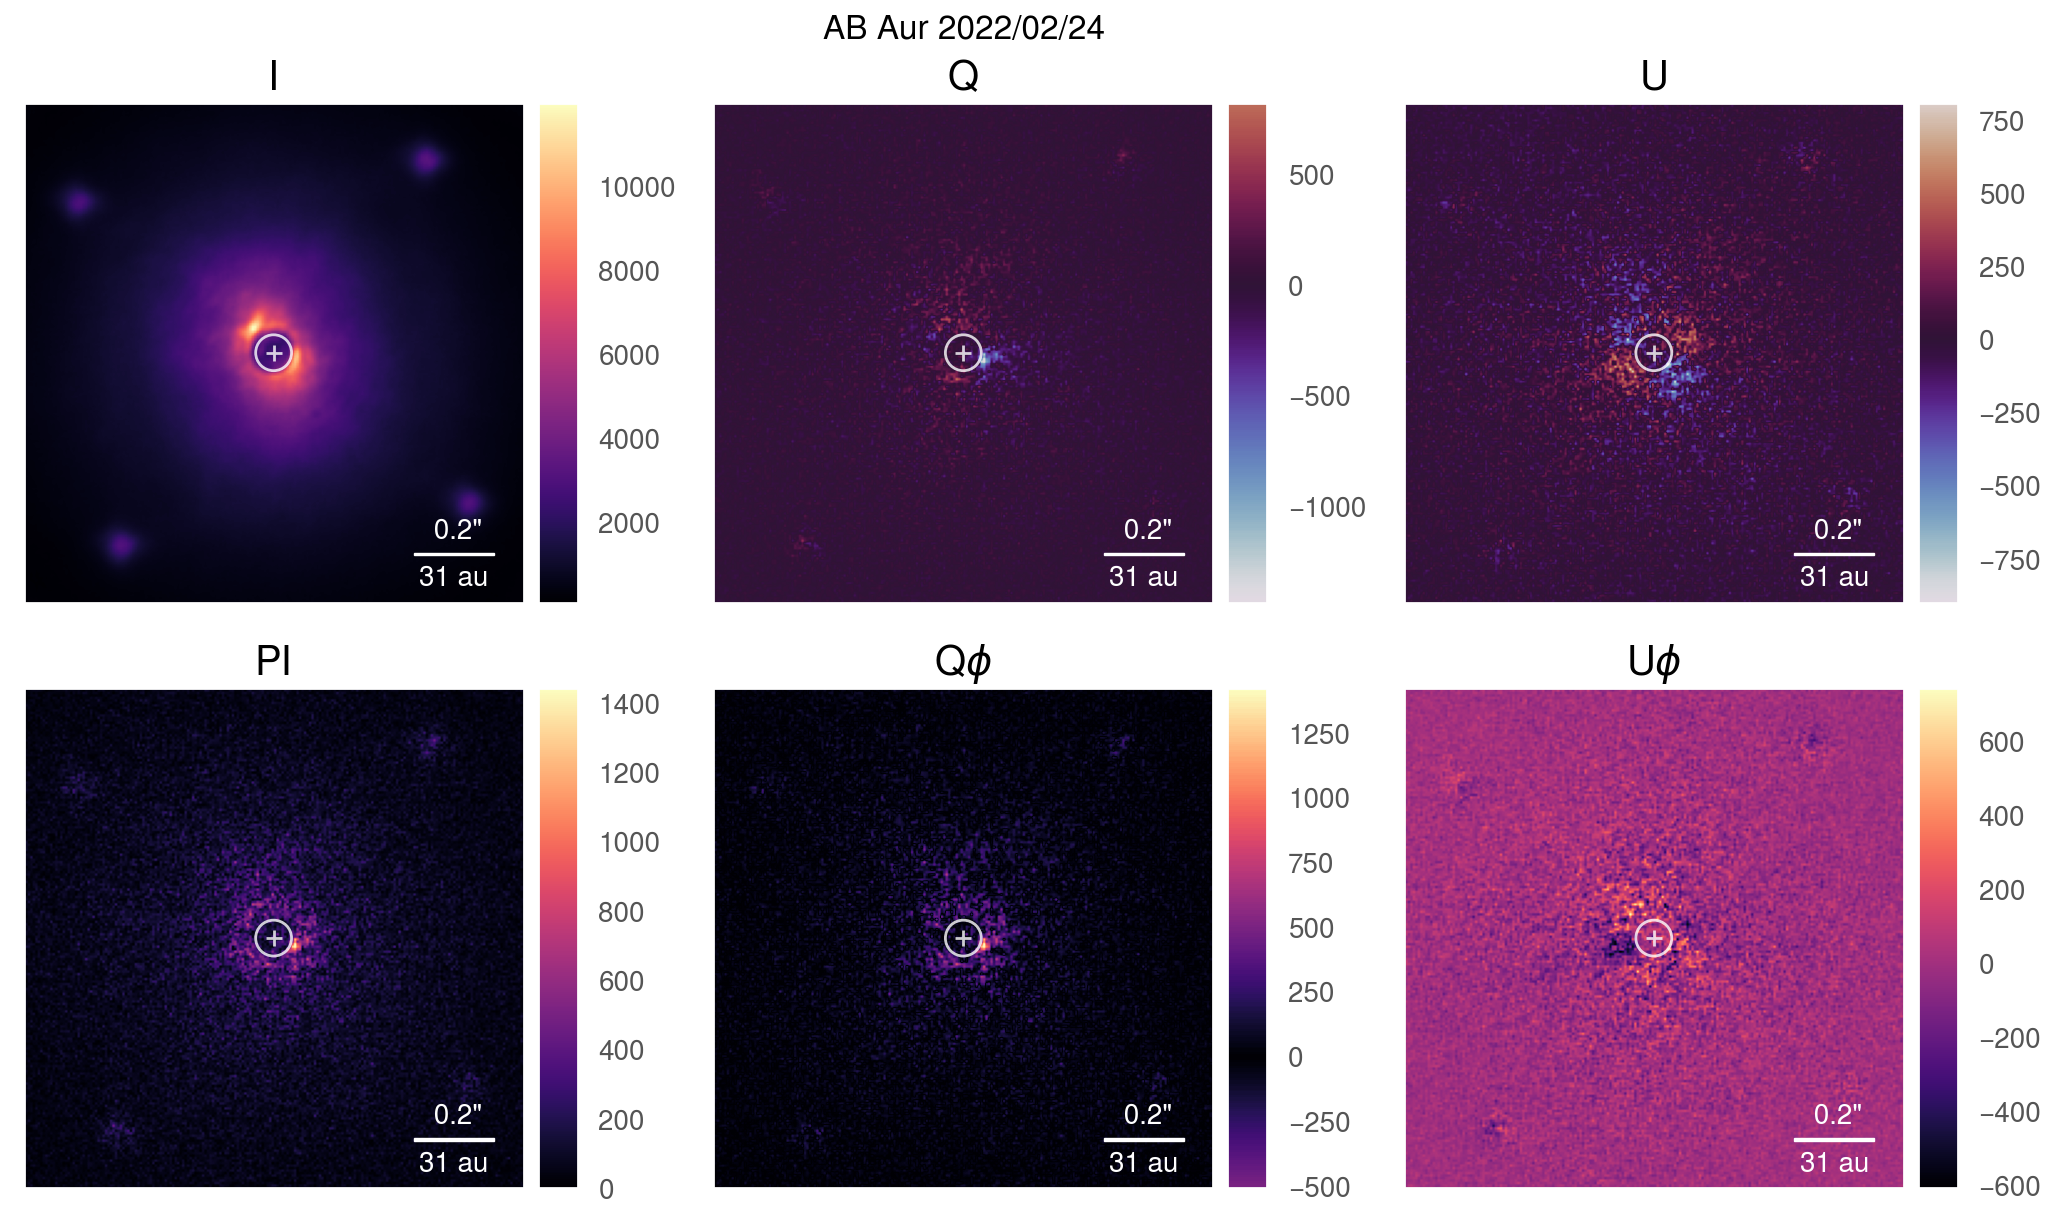

In [ ]:
from matplotlib.patches import Circle, Rectangle

plate_scale = 6.24

fig, axes = pro.subplots(ncols=3, nrows=2, share=2)

axes.format(grid=False)
im = axes[0, 0].imshow(stokes_cube_ip[0], cmap="magma")
axes[0, 0].colorbar(im)
im = axes[0, 1].imshow(stokes_cube_ip[1], cmap="twilight", norm="div")
axes[0, 1].colorbar(im)
im = axes[0, 2].imshow(stokes_cube_ip[2], cmap="twilight", norm="div")
axes[0, 2].colorbar(im)


stokemap = pro.Colormap("magma_r", "magma")

im = axes[1, 0].imshow(PI, cmap="magma", vmin=0)
axes[1, 0].colorbar(im)
im = axes[1, 1].imshow(Qphi, cmap=stokemap, norm="div")
axes[1, 1].colorbar(im)
im = axes[1, 2].imshow(Uphi, cmap="magma")
axes[1, 2].colorbar(im)

[ax.format(title=t) for t, ax in zip(("I", "Q", "U", "PI", "Q$\phi$", "U$\phi$"), axes)]

# coronagraph cross
# scale bar
bar_width_arc = 2e2  # mas
bar_width = bar_width_arc / plate_scale
abaur_plx = 6.4127  # mas
bar_width_au = bar_width_arc / abaur_plx
ctr = (128.5, 128.5)

for ax in axes:
    ax.scatter(ctr[0], ctr[1], color="white", alpha=0.8, marker="+", ms=30, lw=1)
    circ = Circle(ctr, 45 / plate_scale, ec="white", fill=False, alpha=0.8, lw=1)
    rect = Rectangle([185, 47], bar_width, 1, color="white")

    ax.add_patch(circ)
    ax.add_patch(rect)
    ax.text(185 + bar_width / 2, 45 + 9, ' 0.2"', c="white", ha="center")
    ax.text(
        185 + bar_width / 2, 45 - 10, f"{bar_width_au:.0f} au", c="white", ha="center"
    )


width = 201
axes.format(
    xticks=False,
    yticks=False,
    xlim=(ctr[0] - width / 2, ctr[0] + width / 2),
    ylim=(ctr[1] - width / 2, ctr[1] + width / 2),
)
fig.suptitle("AB Aur 2022/02/24")
